<a href="https://colab.research.google.com/github/phanthuyanh/Data-Mining/blob/main/Weather_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Business Understanding
Weather forecast has been playing a vital role in people's life. Being able to know the weather situation in advance could enhance planning quality and life experience, not to mention that necessary protective approaches could be executed timely in case of severe weather.

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
from pandas.api.types import CategoricalDtype
from IPython.display import display, Markdown
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns

##Data Understanding
The data is collected in Seattle, where weather is attempted to be predicted based on certain conditions.

General overview of the dataset as well as its independent and dependent variables is obtained using .info()

In [2]:
url = "https://raw.githubusercontent.com/phanthuyanh/homework/main/seattle-weather%20(1).csv"
rawDF = pd.read_csv(url)
rawDF.info()
rawDF.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


Column "date" is dropped as it assumes to add no value to the modelling and also to understand the data pattern

In [3]:
clean1 = rawDF.drop(['date'], axis=1)
clean1.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain


The use of pairplot point out noticeable correlations and patterns

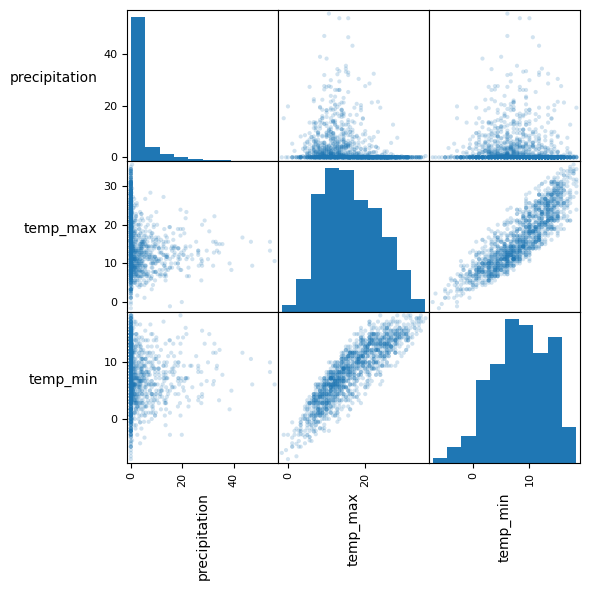

In [4]:
selDF = rawDF.iloc[:, :4]
fig = scatter_matrix(selDF, alpha=0.2, figsize=(6, 6), diagonal="hist")
for ax in fig.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha("right")
plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

In [5]:
cntDiag = rawDF["weather"].value_counts()
propDiag = rawDF["weather"].value_counts(normalize=True)
cntDiag
propDiag

rain       0.438741
sun        0.438056
fog        0.069131
drizzle    0.036277
snow       0.017796
Name: weather, dtype: float64

##Data Preparation
As mentioned in the report, there are no missing values that needs to be processed. By changing the data type of the dependent variable 'weather' from object ot category, we can prevent potential issues during the modelling. The weather is not ordered as each type is an independent category, so the order is set to False.

In [6]:
catType = CategoricalDtype(categories=["drizzle","rain", "sun", "snow","fog"], ordered=False)
clean1["weather"] = clean1["weather"].astype(catType)
clean1["weather"]

0       drizzle
1          rain
2          rain
3          rain
4          rain
         ...   
1456       rain
1457       rain
1458        fog
1459        sun
1460        sun
Name: weather, Length: 1461, dtype: category
Categories (5, object): ['drizzle', 'rain', 'sun', 'snow', 'fog']

The data seems to not have much of the difference in the measuring scale.

In [7]:
clean1[["precipitation","temp_max","temp_min","wind"]].describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


Now the dataset is splitted into test and train set. 30% of the dataset will be used for testing, and the remaining 70% will be used for training.

In [8]:
excluded = ["weather"]  # list of columns to exclude
X = clean1.drop(excluded, axis=1)
y = clean1["weather"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
X_train.head()

,precipitation,temp_max,temp_min,wind
1452,6.1,5.0,2.8,7.6
762,2.0,7.8,2.8,0.8
932,0.0,23.9,13.3,2.2
435,1.3,10.6,6.1,1.1
629,0.0,21.1,13.3,2.5


##Modeling and Evaluation
Respectively, the KNN, NB, and Decision Tree are conducted and evaluated. For evaluation, a confusion matrix is displayed to compare the predicted values against the real value in the dataset, and wrapped up using the accuracy score.
THe modeling on this Weather Detection dataset is conducted as a comparison to the experience on the Stress Detection dataset, so we keep the test and train set size the same between the two datasets.

###KNN Modeling and Evaluation

In [9]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train.iloc[:,:15], y_train)
# # make predictions on the test set
y_pred = knn.predict((X_test.iloc[:,:15]))
y_pred

array(['sun', 'rain', 'rain', 'sun', 'rain', 'rain', 'sun', 'fog', 'rain',
       'sun', 'sun', 'sun', 'rain', 'sun', 'sun', 'rain', 'sun', 'rain',
       'sun', 'sun', 'rain', 'sun', 'rain', 'sun', 'sun', 'rain', 'sun',
       'sun', 'sun', 'sun', 'rain', 'sun', 'fog', 'rain', 'sun', 'rain',
       'rain', 'rain', 'rain', 'sun', 'rain', 'sun', 'fog', 'sun', 'rain',
       'rain', 'rain', 'fog', 'sun', 'sun', 'sun', 'rain', 'sun', 'rain',
       'sun', 'rain', 'rain', 'sun', 'rain', 'sun', 'rain', 'sun', 'fog',
       'sun', 'sun', 'sun', 'rain', 'sun', 'rain', 'rain', 'rain', 'sun',
       'sun', 'sun', 'rain', 'rain', 'sun', 'sun', 'rain', 'sun', 'rain',
       'fog', 'rain', 'sun', 'rain', 'sun', 'sun', 'rain', 'sun', 'rain',
       'rain', 'sun', 'sun', 'rain', 'rain', 'sun', 'rain', 'sun', 'sun',
       'rain', 'sun', 'sun', 'rain', 'sun', 'rain', 'sun', 'sun', 'rain',
       'fog', 'rain', 'rain', 'fog', 'rain', 'rain', 'sun', 'drizzle',
       'fog', 'rain', 'rain', 'rain', 'rai

In [10]:
y_test

892         sun
1105       rain
413        rain
522         sun
1036       rain
         ...   
323        rain
650        rain
439        rain
798        rain
135     drizzle
Name: weather, Length: 439, dtype: category
Categories (5, object): ['drizzle', 'rain', 'sun', 'snow', 'fog']

In [11]:
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
cm

array([[  1,   2,   1,   0,  10],
       [  2,   4,   2,   0,  24],
       [  1,   2, 166,   0,  23],
       [  0,   1,   3,   1,   3],
       [  3,  14,  15,   0, 161]])

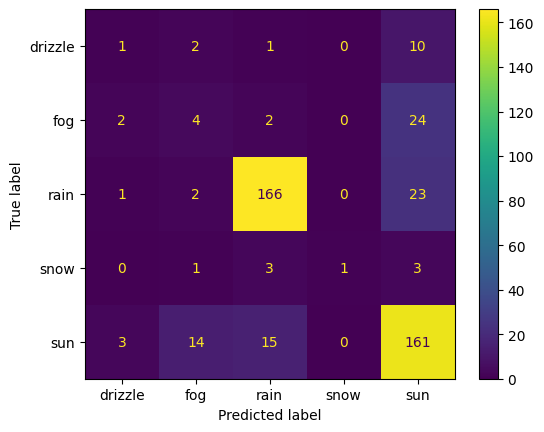

In [12]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7585421412300684

###NB Modeling and Evaluation

In [14]:
#NB MOODELING
X1 = clean1.drop(excluded, axis=1)
y1 = clean1["weather"]
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.3, random_state=42
)

In [15]:
nb = GaussianNB()
nb.fit(X1_train.iloc[:,:15], y1_train)
y_nb_predict = nb.predict((X1_test.iloc[:,:15]))
y_nb_predict

array(['sun', 'rain', 'sun', 'sun', 'rain', 'rain', 'sun', 'sun', 'rain',
       'sun', 'sun', 'sun', 'rain', 'sun', 'sun', 'rain', 'sun', 'sun',
       'sun', 'sun', 'rain', 'sun', 'rain', 'sun', 'sun', 'rain', 'sun',
       'sun', 'sun', 'sun', 'rain', 'sun', 'sun', 'rain', 'sun', 'rain',
       'rain', 'rain', 'rain', 'sun', 'rain', 'sun', 'sun', 'sun', 'sun',
       'rain', 'rain', 'sun', 'rain', 'sun', 'sun', 'rain', 'sun', 'rain',
       'sun', 'rain', 'rain', 'sun', 'rain', 'sun', 'rain', 'sun', 'rain',
       'sun', 'sun', 'sun', 'rain', 'sun', 'rain', 'rain', 'rain', 'sun',
       'sun', 'rain', 'rain', 'sun', 'rain', 'sun', 'rain', 'snow',
       'rain', 'sun', 'rain', 'sun', 'rain', 'sun', 'sun', 'rain', 'sun',
       'rain', 'rain', 'sun', 'sun', 'rain', 'snow', 'sun', 'sun', 'rain',
       'sun', 'rain', 'sun', 'sun', 'rain', 'snow', 'rain', 'sun', 'sun',
       'rain', 'sun', 'rain', 'rain', 'sun', 'rain', 'rain', 'drizzle',
       'drizzle', 'sun', 'sun', 'sun', 'rain', 

In [16]:
y1_test

892         sun
1105       rain
413        rain
522         sun
1036       rain
         ...   
323        rain
650        rain
439        rain
798        rain
135     drizzle
Name: weather, Length: 439, dtype: category
Categories (5, object): ['drizzle', 'rain', 'sun', 'snow', 'fog']

In [17]:
cm1 = confusion_matrix(y1_test, y_nb_predict, labels=nb.classes_)
cm1

array([[  2,   0,   0,   0,  12],
       [  1,   0,   0,   0,  31],
       [  0,   0, 173,   4,  15],
       [  0,   0,   4,   4,   0],
       [  3,   0,   0,   0, 190]])

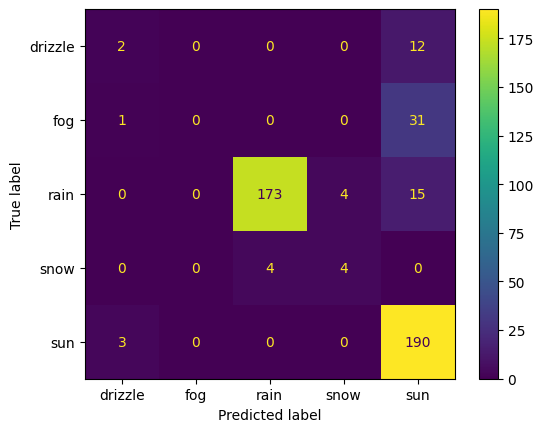

In [18]:
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=nb.classes_)
disp1.plot()
plt.show()

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y1_test, y_nb_predict)

0.8405466970387244

###Decision Tree Modeling and Evaluation

---



In [22]:
y2= rawDF['weather']
excluded2 = rawDF[['weather','date']]
X2= rawDF.drop(excluded2, axis =1)
X2_train, X2_test, y2_train, y2_test= train_test_split(X2, y2, test_size=0.3, random_state=42)
X2_train.head()

,precipitation,temp_max,temp_min,wind
1452,6.1,5.0,2.8,7.6
762,2.0,7.8,2.8,0.8
932,0.0,23.9,13.3,2.2
435,1.3,10.6,6.1,1.1
629,0.0,21.1,13.3,2.5


In [23]:
#define the classification algorithm
dt_clsf=tree.DecisionTreeClassifier(max_depth=2, criterion ="entropy")
dt_clsf=dt_clsf.fit(X2_train, y2_train)
#generating predictions
Y2_predict=dt_clsf.predict(X2_test)

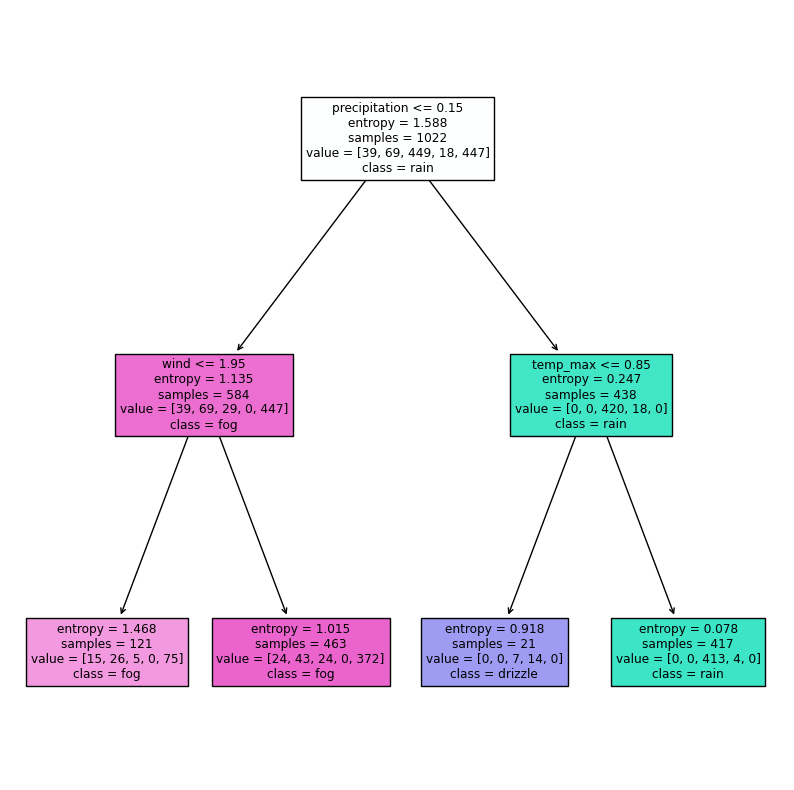

In [24]:
#Plotting decision tree
feature_names=['precipitation', 'temp_min', 'temp_max', 'wind']
class_names=['snow', 'sun', 'rain', 'drizzle', 'fog']
fig = plt.figure(figsize = (10,10))
plot = tree.plot_tree(dt_clsf, feature_names= feature_names, class_names= class_names, filled=True )

In [25]:
cm2 = confusion_matrix(y2_test, Y2_predict, labels = dt_clsf.classes_ )
cm2

array([[  0,   0,   0,   0,  14],
       [  0,   0,   0,   0,  32],
       [  0,   0, 171,   6,  15],
       [  0,   0,   3,   5,   0],
       [  0,   0,   0,   0, 193]])

<function matplotlib.pyplot.show(close=None, block=None)>

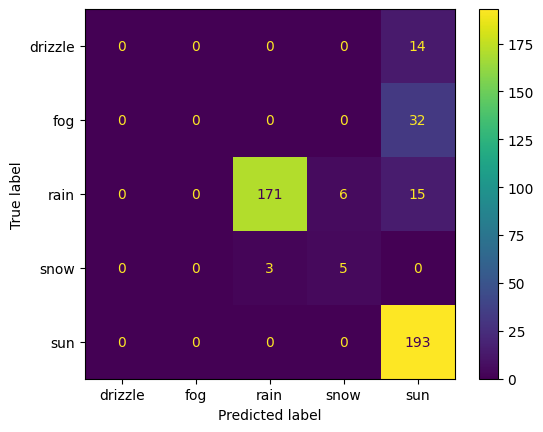

In [26]:
display2 = ConfusionMatrixDisplay(confusion_matrix = cm2, display_labels =  dt_clsf.classes_)
display2.plot()
plt.show

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y2_test, Y2_predict)

0.8405466970387244